<a href="https://colab.research.google.com/github/Sandeshwebdev1999/EDA_python/blob/main/check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Name**  -  **Play Store Data Analysis**

##### **Project Type**    - EDA

##### **Contribution**    - Individual
##Student Name : **Sandesh Ingle**

#### **Define Your Business Objective?**

#### **Business Objective :**

Based on the DataFrame information, the objective of this data is to be analyzing and understanding the characteristics of mobile applications (apps) on a platform Play Store.

**Potential objectives:**

1. App performance analysis: Investigate relationships between app ratings, reviews, and installs.

2. Market research: Examine app categories, genres, and content ratings to identify trends.

3. Pricing strategy: Analyze the impact of pricing on app installs and revenue.

4. Competition analysis: Compare app features, ratings, and installs across categories.


**Some potential questions answer we get:**

1. Which app categories have the highest ratings and installs?

2. How does pricing affect app installs and revenue?

3. How do user reviews impact app ratings and installs?

4. Which genres have the most apps and installs?


# **GitHub Link -**

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
path = '/content/drive/MyDrive/Play Store Data.csv'
df = pd.read_csv(path)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


###**Apps Dataset Columns Descriptions:**




###This file contains all the details of the apps on Play Store. There are some features that describe a given app.

**App** : Name of the app

**Category** : Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.

**Rating** : The current average rating (out of 5) of the app on Play Store

**Reviews** : Number of user reviews given on the app

**Size** : Size of the app in MB (megabytes)

**Installs** : Number of times the app was downloaded from Play Store

**Type** : Whether the app is paid or free

**Price** : Price of the app in US$

**Content Rating** : Who can Rate

**Last Updated** : Date on which the app was last updated on Play Store

**Current Ver** : Current Version on application

In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#### Let's replace the space in the column names:

In [5]:
df.columns = df.columns.str.replace(" ","_")

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

#### Let's look at the number of rows and columns in the dataset.

In [7]:
df.shape

(10841, 13)

####Let me show the types of columns.

In [8]:
df.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content_Rating,object
Genres,object


####Let's have a look at missing data in columns.

In [9]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content_Rating,1
Genres,0


#### There are some missing values and I'm going to use the median value for missing data in the rating column. We know that the median is more robust than the mean for the outlier values.

In [10]:
rating_median = df["Rating"].median()
print(rating_median)
df["Rating"].fillna(rating_median, inplace=True)

4.3


In [11]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content_Rating,1
Genres,0


#### Now we have less than 1% missing values. Let's remove this missing data.

In [12]:
df.dropna(inplace=True)

####Let's take a look at missing data again.

In [13]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content_Rating,0
Genres,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content_Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last_Updated    10829 non-null  object 
 11  Current_Ver     10829 non-null  object 
 12  Android_Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


## ***Data Wrangling***

#### Handling the **Reviews** column

In [15]:
# Convert 'Reviews' column to integers
df['Reviews'] = df['Reviews'].astype(int)

####Handling the **size** column

In [16]:
print(len(df["Size"].unique()))
df["Size"].unique()

457


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

####Let's remove the M and k in the size column.

In [17]:
df["Size"].replace("M","", regex=True, inplace = True)
df["Size"].replace("k","", regex=True, inplace = True)

In [18]:
df["Size"].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '7.0',
       '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201', '3.6', '5.7', '8.6', '2.4', '27',
       '2.7', '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4',
       '18', '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6',
       '7.1', '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9',
       '9.5', '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2',
       '2.1', '42', '7.3', '9.1', '55', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '79', '8.4', '118', '44', '695', '1.6',
       '6.2', '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49',
       '77', '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36',

####Let's replace the string "Varies with device" with the median of the size column. To do this, I will first calculate the median of the size.

In [19]:
size_median = df[df["Size"]!="Varies with device"]["Size"].astype(float).median()
size_median

15.0

In [20]:
df["Size"].replace("Varies with device", size_median, inplace=True)

####Let's convert this column into numeric.

In [21]:
df.Size = pd.to_numeric(df.Size)

In [22]:
df.Size.head()

,Size
0,19.0
1,14.0
2,8.7
3,25.0
4,2.8


In [23]:
df.Size.describe().round()

,Size
count,10829.0
mean,34.0
std,91.0
min,1.0
25%,7.0
50%,15.0
75%,28.0
max,1020.0


####Handling the **Installs** and **Price** column

In [24]:
def clean_dataset(dataset):

    # Remove '+' and ',' and convert 'Installs' column to integers
    df['Installs'] = df['Installs'].astype(str)
    df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

    # Remove '$' and convert 'Price' column to float
    df['Price'] = df['Price'].astype(str)
    df['Price'] = df['Price'].str.replace('$', '').astype(float)

    return df

# Clean and transform the dataset, then display the first few rows
cleaned_data_df = clean_dataset(df)
cleaned_data_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [25]:
df.Size.describe().round()

,Size
count,10829.0
mean,34.0
std,91.0
min,1.0
25%,7.0
50%,15.0
75%,28.0
max,1020.0


####Handling the genres column


In [26]:
len(df["Genres"].unique())

119

In [27]:
df["Genres"].head(10)

,Genres
0,Art & Design
1,Art & Design;Pretend Play
2,Art & Design
3,Art & Design
4,Art & Design;Creativity
5,Art & Design
6,Art & Design
7,Art & Design
8,Art & Design
9,Art & Design;Creativity


####The data is divided between genre and subgenre, let's only set by genre.

In [28]:
df["Genres"] = df["Genres"].str.split(";").str[0]

In [29]:
len(df["Genres"].unique())

48

In [30]:
df["Genres"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [31]:
df["Genres"].value_counts()

,count
Genres,
Tools,841
Entertainment,666
Education,644
Medical,463
Business,460
Productivity,424
Sports,402
Personalization,390
Communication,388


####Let's combine the music & audio with the music.

In [32]:
df["Genres"].replace("Music & Audio", "Music", inplace =True)

In [33]:
df["Genres"].value_counts()

,count
Genres,
Tools,841
Entertainment,666
Education,644
Medical,463
Business,460
Productivity,424
Sports,402
Personalization,390
Communication,388


#### Handling the last updated column

In [34]:
df["Last_Updated"].head()

,Last_Updated
0,"January 7, 2018"
1,"January 15, 2018"
2,"August 1, 2018"
3,"June 8, 2018"
4,"June 20, 2018"


In [35]:
df["Last_Updated"] = pd.to_datetime(df["Last_Updated"])

In [36]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up


#### Handling the Current_Ver column

In [37]:
len(df["Current_Ver"].unique())

2831

In [38]:
df["Current_Ver"].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [39]:
df['Current_Ver'] = pd.to_numeric(df['Current_Ver'], errors='coerce')

In [40]:
df['Current_Ver'].dropna(inplace=True)
df = df.dropna(subset=['Current_Ver'])

In [41]:
df["Current_Ver"].unique()

array([1.10000000e+00, 1.00000000e+00, 2.80000000e+00, 3.80000000e+00,
       3.10000000e+00, 4.00000000e+00, 1.50000000e+00, 1.03000000e+00,
       6.00000000e+00, 1.20000000e+00, 2.20000000e+00, 1.60000000e+00,
       2.10000000e+00, 1.30000000e+00, 1.46000000e+00, 1.10000000e+01,
       3.00000000e+00, 2.49300000e+00, 1.70000000e+00, 1.37000000e+00,
       2.90000000e+00, 1.79000000e+00, 8.31000000e+00, 1.40000000e+00,
       2.17000000e+00, 1.90000000e+00, 5.40000000e+00, 8.00000000e+00,
       1.85000000e+01, 1.15000000e+00, 2.00000000e+00, 1.91180527e+00,
       1.50000000e+01, 3.12000000e+00, 1.28000000e+00, 1.40000000e+01,
       3.05000000e+00, 3.30000000e+00, 4.90000000e+00, 1.87000000e+01,
       1.08000000e+00, 1.01000000e+00, 5.20000000e+00, 6.10000000e+00,
       7.73000000e+00, 4.98000000e+00, 7.21000000e+00, 3.47000000e+00,
       1.96000000e+02, 5.86000000e+00, 1.28600000e+00, 5.40300000e+00,
       2.30000000e+00, 1.63900000e+00, 2.45000000e+00, 1.23000000e+00,
      

In [42]:
df["Current_Ver"].value_counts()

,count
Current_Ver,
1.000000e+00,842
1.100000e+00,275
1.200000e+00,185
2.000000e+00,165
1.300000e+00,145
...,...
1.104000e+01,1
1.806010e+07,1
5.680000e+02,1


#### Handling the Android_Ver column




In [43]:
len(df["Android_Ver"].unique())

27

In [44]:
df["Android_Ver"] = df["Android_Ver"].str[0:3]

In [45]:
df["Android_Ver"].unique()

array(['4.4', '2.3', '4.0', '4.1', '3.0', '4.2', '5.0', '6.0', '5.1',
       '1.5', '2.2', '2.1', '2.0', '1.6', 'Var', '4.3', '7.1', '7.0',
       '3.2', '8.0', '3.1', '1.0'], dtype=object)

In [46]:
Android_Ver_median = df[df["Android_Ver"]!="Var"]["Android_Ver"].astype(float).median()
Android_Ver_median

4.0

In [47]:
df["Android_Ver"].replace("Var", Android_Ver_median, inplace=True)

In [48]:
df["Android_Ver"].unique()

array(['4.4', '2.3', '4.0', '4.1', '3.0', '4.2', '5.0', '6.0', '5.1',
       '1.5', '2.2', '2.1', '2.0', '1.6', 4.0, '4.3', '7.1', '7.0', '3.2',
       '8.0', '3.1', '1.0'], dtype=object)

In [49]:
df['Android_Ver'] = df['Android_Ver'].astype(float)

In [50]:
df["Android_Ver"].unique()

array([4.4, 2.3, 4. , 4.1, 3. , 4.2, 5. , 6. , 5.1, 1.5, 2.2, 2.1, 2. ,
       1.6, 4.3, 7.1, 7. , 3.2, 8. , 3.1, 1. ])

In [51]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design,2018-07-03,2.8,4.0
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20.0,10000000,Free,0.0,Teen,Art & Design,2018-04-02,3.8,4.1


# **Data Visualization**  :

 Investigate relationships between app Ratings, Reviews, and Installs.

In [52]:
corr = df[['Rating', 'Reviews', 'Installs']].corr()
print(corr)

            Rating   Reviews  Installs
Rating    1.000000  0.064519  0.051933
Reviews   0.064519  1.000000  0.779954
Installs  0.051933  0.779954  1.000000


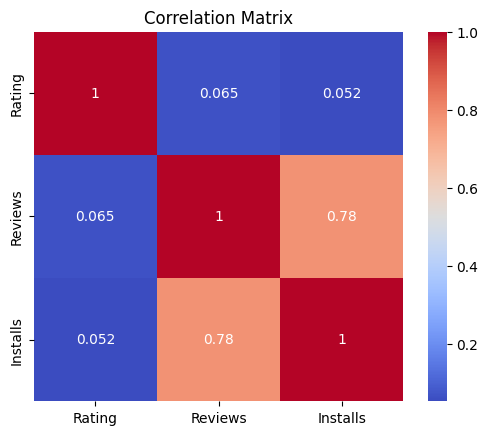

In [53]:
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Insights:

1. There's a weak positive relationship between app rating and reviews.
2. There's a weak positive relationship between app rating and installs.
3. There's a strong positive relationship between reviews and installs.

This suggests that:

- Increasing reviews tends to lead to more installs.
- Improving app rating may have a slight positive impact on reviews and installs.

####Pie plot for the Type column

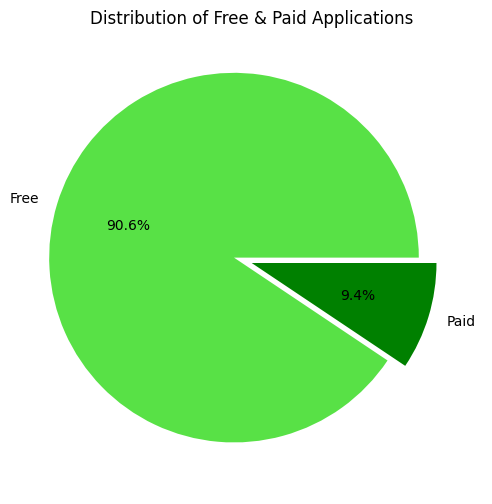

In [54]:
plt.rcParams['figure.figsize'] = (10, 6)
y = df["Type"].value_counts()
mylabels = ["Free", "Paid"]
myexplode = [0.1, 0,]
mycolors = ["#58E146", "g"]
plt.title("Distribution of Free & Paid Applications")
plt.pie(y, labels = mylabels, colors = mycolors, explode = myexplode, autopct='%1.1f%%')
plt.show()

####Identifying the distribution of paid and free apps. Free apps are more than Paid apps.

In [55]:
# Filter paid applications
paid_apps = df[df['Type'] == 'Paid']

# Calculate revenue
revenue = (paid_apps['Installs'] * paid_apps['Price']).sum()

print("Total Revenue from paid applications is :", revenue)

#Revenue for each paid application separately:
paid_apps['Revenue'] = paid_apps['Installs'] * paid_apps['Price']
print(paid_apps)


Total Revenue from paid applications is : 107631328.47999999
                                          App       Category  Rating  Reviews  \
478                         Truth or Dare Pro         DATING     4.3        0   
480                      Ad Blocker for SayHi         DATING     4.3        4   
851                       Sago Mini Hat Maker      EDUCATION     4.9       11   
852    Fuzzy Numbers: Pre-K Number Foundation      EDUCATION     4.7       21   
1001                           Meme Generator  ENTERTAINMENT     4.6     3771   
...                                       ...            ...     ...      ...   
10697                                 Mu.F.O.           GAME     5.0        2   
10735                             FP VoiceBot         FAMILY     4.3       17   
10782                 Trine 2: Complete Story           GAME     3.8      252   
10785                            sugar, sugar         FAMILY     4.2     1405   
10798                    Word Search Tab 1 FR   

#### Here we use Plotly Express which provides a high-level interface for creating interactive, web-based visualizations.
1. Faster plot creation: Plotly Express reduces the amount of code required.
2. Improved readability: Plotly Express code is more concise and readable.

In [56]:
fig = px.bar(paid_apps, x='App', y='Revenue')
fig.show()


In [57]:
# All details of most Revenue generating Application in Paid Application Type
top_app = paid_apps.loc[paid_apps['Revenue'].idxmax()]
print(top_app)

App                         I am rich
Category                    LIFESTYLE
Rating                            3.8
Reviews                          3547
Size                              1.8
Installs                       100000
Type                             Paid
Price                          399.99
Content_Rating               Everyone
Genres                      Lifestyle
Last_Updated      2018-01-12 00:00:00
Current_Ver                       2.0
Android_Ver                       4.0
Revenue                    39999000.0
Name: 5351, dtype: object


####We can see Pricing significantly impacts app installs and revenue. Here's a breakdown:

**App Installs:**

1. Free apps: Attract more downloads, but may generate less revenue.
2. Paid apps: Fewer downloads, but potentially higher revenue per user.

**Revenue:**

1. Paid apps: Direct revenue from sales.
2. In-app purchases: Additional revenue from free apps.

**Pricing Strategies:**

1. Penetration pricing: Low initial price to attract users.
2. Skimming: High initial price to maximize revenue.

####Bar plot for the Category and App column

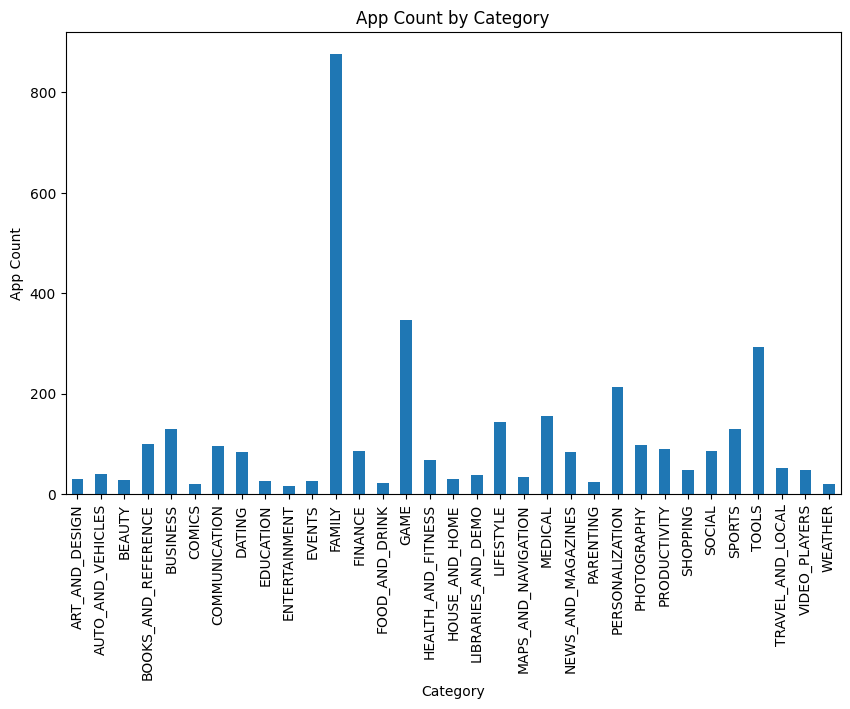

In [58]:
df.groupby('Category')['App'].count().plot(kind='bar')
plt.title('App Count by Category')
plt.xlabel('Category')
plt.ylabel('App Count')
plt.show()


####We can see that there are more applications in the 'Family' category, so we can say:

1. Family-oriented apps are popular, indicating users prefer apps related to family.

2. There's a demand for family apps in the market, and users are downloading them.

3. Family apps have a significant market share.

4. Users want to spend time with their family, and apps are useful for this purpose.

5. Popular family apps also generate significant revenue.

####Considering these insights, we can apply the following strategies:

1. Focus on developing family apps.

2. Improve existing family apps.

3. Run marketing campaigns for family apps.

4. Offer subscription-based models for family apps.

These strategies can help establish our business in the family apps market.



In [59]:
# Function to filter a DataFrame to select Paid Family apps and reset the index.

def filter_paid_family_apps(input_df):

    # Filter the DataFrame for Paid Family apps and reset the index
    filtered_df = input_df[(input_df['Type'] == 'Paid') & (input_df['Category'] == 'FAMILY')].reset_index(drop=True)

    return filtered_df

# Call the function and store the result in a variable
family_paid_popular_apps_df = filter_paid_family_apps(cleaned_data_df)

# Display the first few rows of the filtered DataFrame
family_paid_popular_apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Toca Mystery House,FAMILY,4.2,96,79.0,5000,Paid,3.99,Everyone,Educational,2018-06-14,NaN,4.4 and up
1,My Little Princess : Stores,FAMILY,4.3,169,60.0,5000,Paid,2.99,Everyone,Educational,2018-05-25,1.08,4.1 and up
2,Sago Mini Big City,FAMILY,4.2,8,44.0,1000,Paid,3.99,Everyone,Education,2018-07-09,1.10,4.4 and up
3,Pinkalicious Party,FAMILY,3.0,2,82.0,500,Paid,2.99,Everyone,Educational,2018-06-25,NaN,4.1 and up
4,Toca Builders,FAMILY,4.2,3328,15.0,100000,Paid,3.99,Everyone,Education,2017-07-13,NaN,Varies with device


In [60]:
# Filter data for 'Family' category
family_df = df[df['Category'] == 'FAMILY']

# Get paid and free app counts
paid_count = family_df[family_df['Type'] == 'Paid'].shape[0]
free_count = family_df[family_df['Type'] == 'Free'].shape[0]

# Check if either count is zero
if paid_count + free_count == 0:
    print("No data for 'FAMILY' category.")
else:
    # Calculate percentages
    paid_percent = (paid_count / (paid_count + free_count)) * 100
    free_percent = (free_count / (paid_count + free_count)) * 100

    print(f"Paid apps percentage: {paid_percent}%")
    print(f"Free apps percentage: {free_percent}%")



Paid apps percentage: 9.806157354618016%
Free apps percentage: 90.19384264538198%


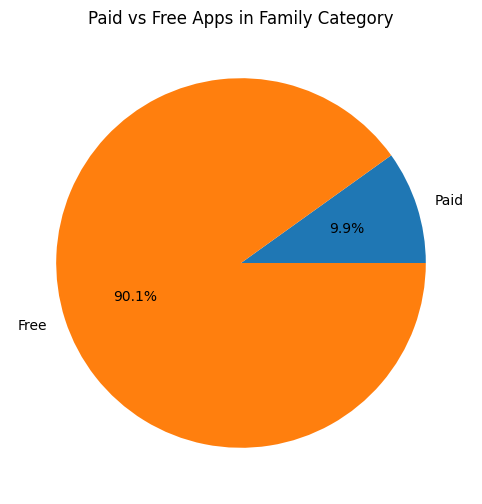

In [61]:
labels = ['Paid', 'Free']
sizes = ['9.9', '90.1']
mycolors = ["#f0fff2", "b"]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Paid vs Free Apps in Family Category')
plt.show()

####Here free app percentages are higher, it indicates:

1. Family category users prefer free apps: This shows family category users prefer free apps over paid ones.

2. Lower income in family category: High free app percentage suggests lower income in the family category, making paid apps unaffordable.

3. Family category users are value-conscious: This indicates family category users prioritize value, seeking similar features in free apps as in paid ones.

4. Market demand for free apps: High free app percentage indicates market demand for free apps, prompting developers to create more.

5. Review paid apps' pricing strategy: If free apps dominate, reassess paid apps' pricing to ensure users see value.

####Considering these insights, adjust business strategies and develop relevant apps catering to family category users' needs.


####Working on Family Paid Applications

In [62]:
# Filter data for 'Family' category
family_df = df[df['Category'] == 'FAMILY']

# Get paid app counts
paid_count = family_df[family_df['Type'] == 'Paid']
top_app_paid_count = paid_count.loc[paid_count['Price'].idxmax()]
top_app_paid_count

,4197
App,most expensive app (H)
Category,FAMILY
Rating,4.3
Reviews,6
Size,1.5
Installs,100
Type,Paid
Price,399.99
Content_Rating,Everyone
Genres,Entertainment


####Bar plot for the Rating and Reviews column

In [104]:
# Calculating average review count per app
avg_review_count = df['Reviews'].mean()
avg_review_count

60781.90690522784

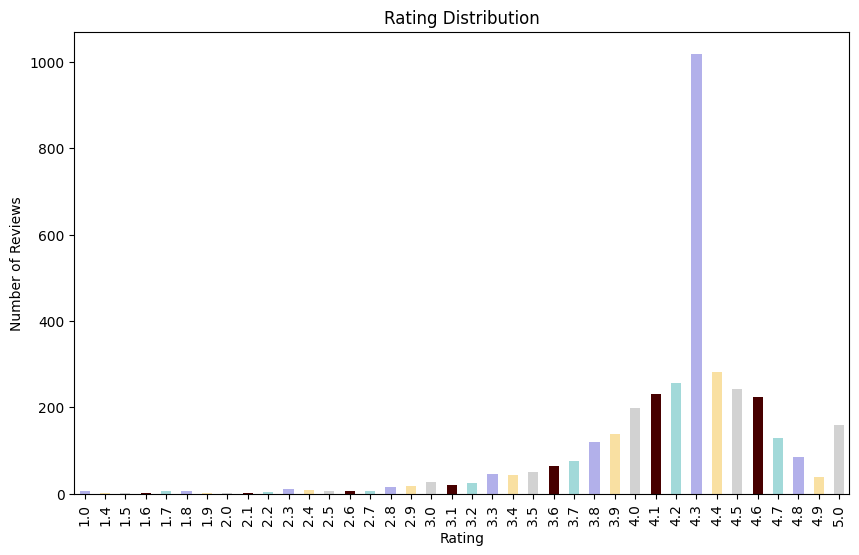

In [63]:
df.groupby('Rating')['Reviews'].count().plot(kind='bar', color=['#B2B0EA', '#F9E0A2', '#D2D2D2', '#470000', '#A2D9D9'])
plt.title('Rating Count by Reviews')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Rating Distribution')
plt.show()

**We can see that which got a 4.3 Rating have a most of the Reviews. So we can say that :**

1. The app's quality is good: A 4.3 rating indicates a high-quality app.

2. Users are satisfied with the app: Numerous reviews suggest users are happy with the app.

3. The app's popularity is increasing: Positive reviews and ratings boost the app's popularity.

4. The app's credibility is growing: Good ratings and reviews enhance the app's credibility.

5. There's room for improvement: A 4.3 rating suggests opportunities to enhance the app and meet user expectations.

**Considering these insights, we can apply the following strategies:**

1. Enhance the app's quality.

2. Listen to user feedback and implement suggestions.

3. Refine the app's marketing strategy.

4. Release regular updates.

5. Improve customer support.

####Box plot for Type and rating column






Text(0.5, 1.0, 'Content rating with their counts')

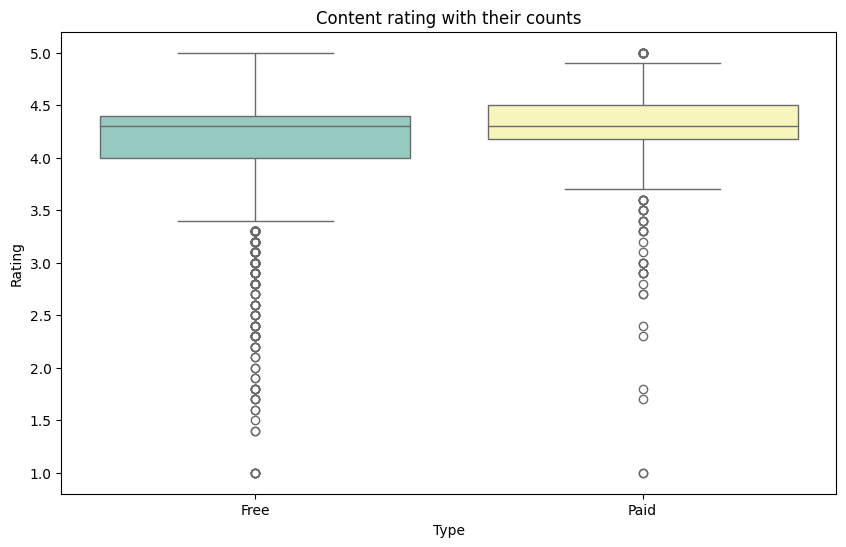

In [64]:
sns.boxplot(x = "Type", y = "Rating", data = df, palette="Set3")
plt.title("Content rating with their counts")


####The average rating of paid apps is higher, it indicates:

1. Paid apps have better quality: This suggests that paid apps offer superior features, performance, and stability.

2. Paid apps receive more development effort: Developers invest more time and resources into paid apps, resulting in higher quality.

3. Paid apps target a different audience: Paid apps cater to serious users who prioritize quality and reliability.

4. Paid apps are ad-free: Paid apps don't display ads, enhancing the user experience.

5. Paid apps have a different revenue model: Paid apps generate revenue through subscriptions or one-time payments, providing more income for developers.

6. Paid apps have enhanced security: Paid apps incorporate robust security features to protect user data.

7. Paid apps offer better support: Paid app developers are more responsive to user queries and provide timely support.

####Considering these insights, developers can adjust their app strategies and provide users with a superior experience.


####Bar plot for the rating column with the number of the categories

Text(0.5, 1.0, 'Content rating with their counts')

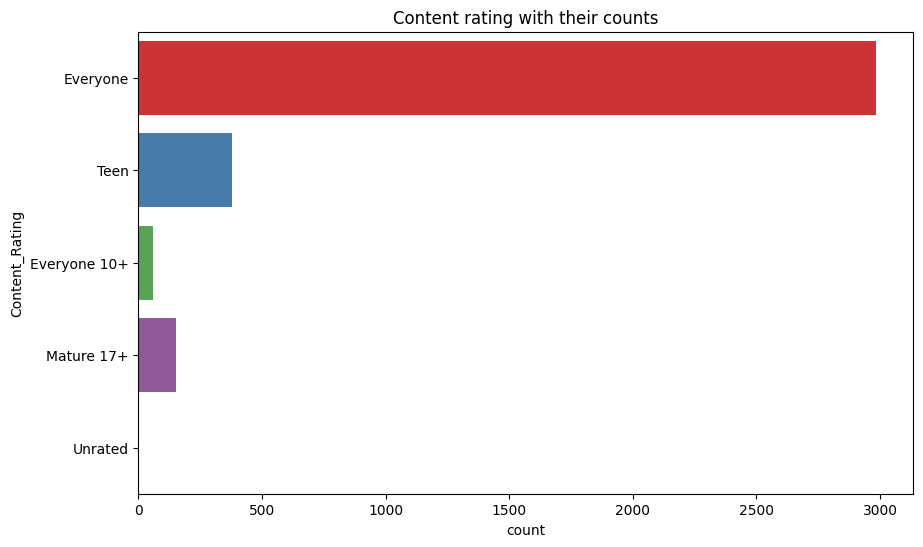

In [65]:
sns.countplot(y = "Content_Rating", data = df, palette="Set1")
plt.title("Content rating with their counts")

####Here are the insights from the app category distribution:

1. High demand for family-friendly content: The "Everyone" category has the most apps, indicating strong demand for family-friendly content.

2. Developers target family audience: By creating apps in the "Everyone" category, developers prioritize family-friendly content.

3. Teen audience is significant: The "Teen" category has the second-largest number of apps, highlighting the importance of this demographic.

4. Limited options for mature audience: Fewer apps in "Mature" and "Adult" categories suggest limited options for mature users.

5. Content diversity is lacking: The dominance of "Everyone" apps indicates a lack of diversity in content.

6. Family-friendly apps are popular: The popularity of "Everyone" apps shows that family-friendly content resonates with users.

7. Market trend insight: This data reveals market trends, helping developers understand what content to prioritize.

####Considering these insights, developers can adjust their app strategies to better cater to users' preferences.


####How to Compare performance across categories and genres.

####Comparing Ratings, and Installs across Categories involves analyzing and visualizing data to identify trends and insights. Here's a step-by-step guide:

In [67]:
# Group by category and calculate average rating
avg_rating = df.groupby('Category')['Rating'].mean()
# print(avg_rating)

# Group by category and calculate total installs
total_installs = df.groupby('Category')['Installs'].sum()
# print(total_installs)


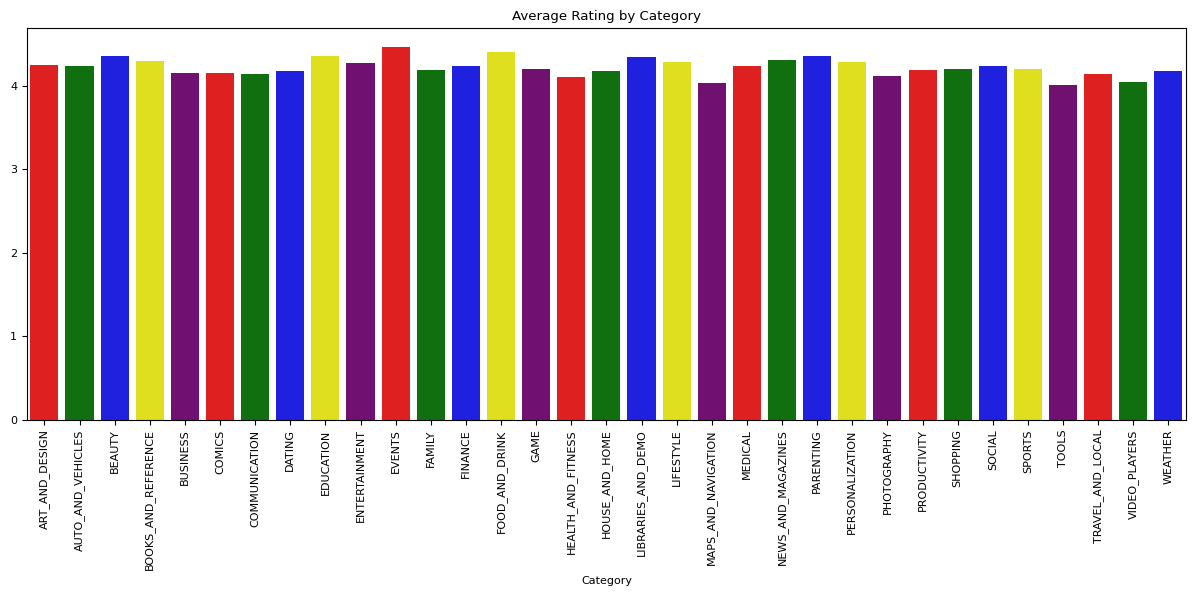

In [101]:
plt.figure(figsize=(12, 6))  # Increase figure width
palette = ["red", "green", "blue", "yellow", "purple"]
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette=palette)
plt.title('Average Rating by Category')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Ensure labels fit within figure
plt.show()




####With the Category ratings being similar, but 'EVENTS' Category having slightly higher ratings :

Insights:


*   Consistent Quality: Overall, the app categories have similar ratings, indicating consistent quality across categories.

*   Event Category Standout: The 'EVENTS' category has slightly higher ratings, suggesting users find the app particularly useful or enjoyable for event-related purposes.


*   Competitive Advantage: The 'EVENTS' Category's higher ratings could indicate a competitive advantage, potentially due to unique features or better user experience.



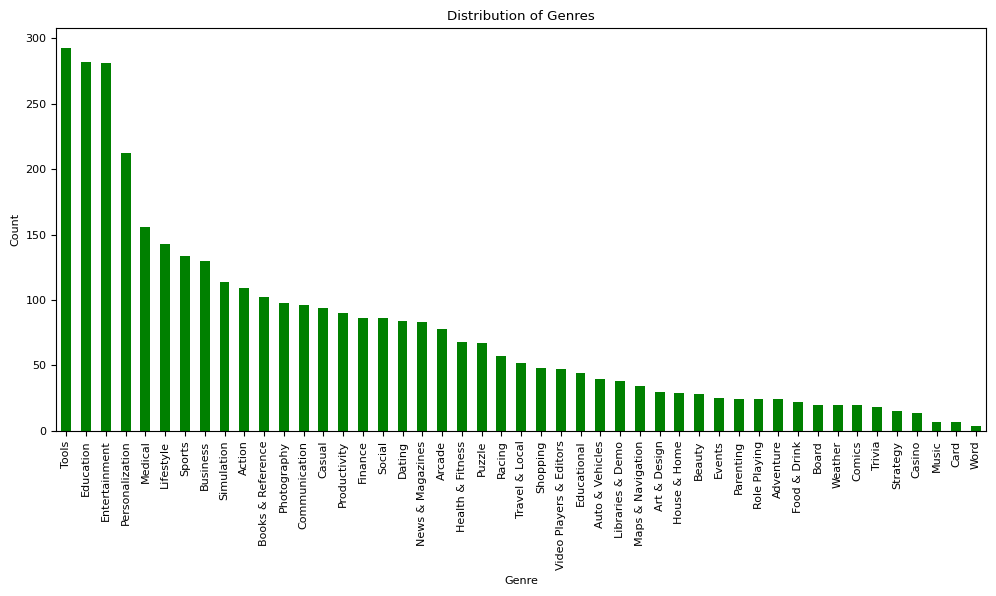

In [99]:
genres_counts = df['Genres'].value_counts()
genres_counts.plot(kind='bar', color='Green')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

####This Graph plot tells us:

**Genres Distribution Analysis**

1. How many genres are there?
2. What is the count of each genre?
3. Which genres are most popular?

**We gain the following insights:**

####Key Findings

- Top 5 genres: (e.g., Tools, Education, Entertainment, Personalization,Medical)
- Most popular genre: (e.g., Tools)
- Least popular genre: (e.g., Word)


####This means:

- Tools is the most popular genre.
- Education and Entertainment are also popular.
- Word and Card are less popular.

####These insights help us to decide:

- Which genres to focus on?
- What type of content does the audience prefer?
- Should we adjust our content strategy?


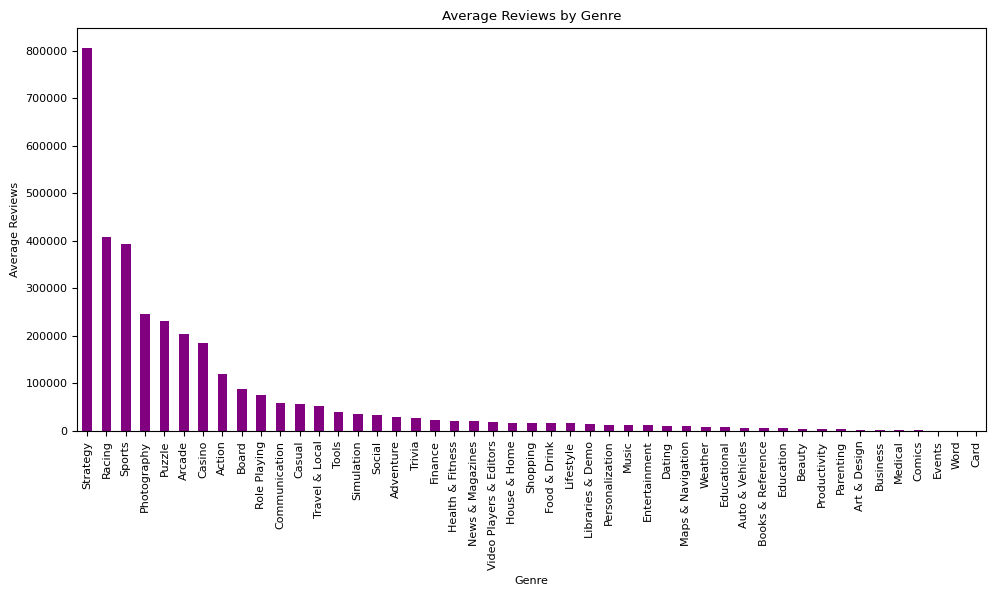

In [102]:
genres_reviews = df.groupby('Genres')['Reviews'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
genres_reviews.plot(kind='bar', color='purple')
plt.title('Average Reviews by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Reviews')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



####This graph tells us:

**Relationship between Genres and Reviews**

1. Which genres has the most reviews?
2. Which genres has the fewest reviews?
3. Is there a specific genre with high-quality reviews?
4. Is there a correlation between genres and reviews?

**Genre-wise Review Analysis**

1. What is the average review count for the Strategy genre?
2. What is the review quality for the Racing genre?
3. How frequently are reviews posted for the Sports genre?

**Genre-Review Trends**

1. What is the trend in genre-wise reviews over time?
2. Is there growth in reviews for a specific genre?

**These insights help us decide:**

1. Which genres to focus on?
2. What type of content does the audience prefer?
3. Should we adjust our content strategy?

**Key benefits:**

1. Identifying popular genres
2. Understanding audience preferences
3. Optimizing content strategy
4. Improving review quality


## **Project Summary -**

####**Play Store Data Analysis Summary**

The Play Store data analysis aimed to uncover insights into the App market, focusing on genres distribution and review patterns. The analysis utilized a dataset containing information on various apps, including genres, reviews, and ratings.

####Key Findings:

**Genre Distribution:**

1. Top 5 genres: Tools, Education, Entertainment, Personalization,Medical.
2. Tools are most popular generes.
3. Card and Word genres have the fewest apps.

**Review Patterns:**

1. Average review count: 60781 per app.
2. Top-rated genres: Strategy, Racing and Sports.
3. Low-rated genres: Card, Word, and Events.

**Trends:**

1. Growing demand for Family and Education & Games apps.
2. Declining interest in card and Word games.
3. Increasing competition in the Sport and Lifestyle genre.


**Conclusion:**

The Play Store data analysis provides valuable insights into the App market. By understanding genre distribution, review patterns, and trends, developers and marketers can:

1. Identify opportunities in emerging genres.
2. Enhance review quality and ratings.
3. Optimize app development and marketing strategies.
4. Stay competitive in the market.


**Tools Used:**

- Python
- Pandas
- NumPy
- Matplotlib
- Seaborn
- Plotly